# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise da parte 1 a partir daqui

In [8]:
dataframe.shape

(10000, 2)

In [12]:
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


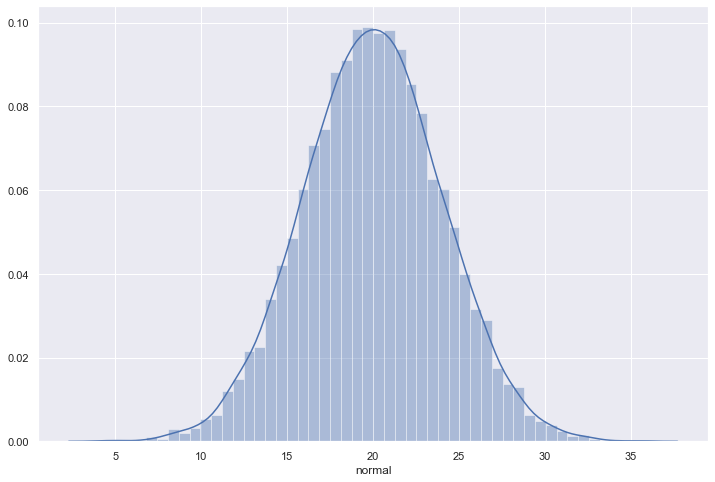

In [59]:
# Distribuição Normal

sns.distplot(dataframe['normal'], label = 'Normal')
plt.show()

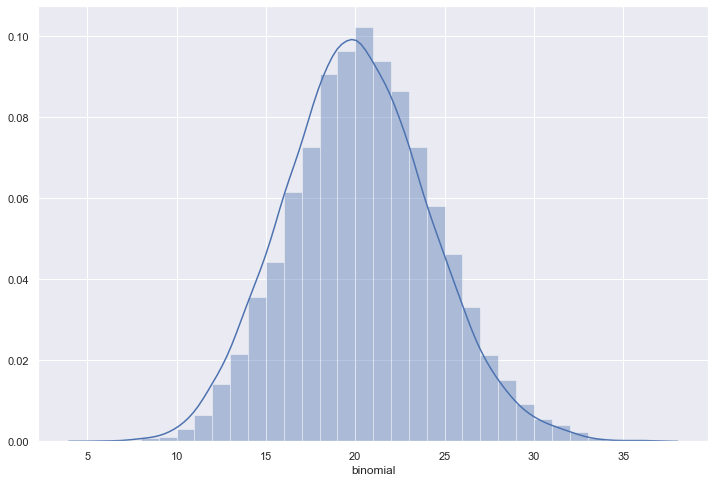

In [69]:
# Distribuição Binomial

sns.distplot(dataframe['binomial'], bins = range(6, 36), label = 'Binomial')
plt.show()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [39]:
def q1():
       
    q1_norm = dataframe['normal'].quantile(q=0.25)
    q2_norm = dataframe['normal'].quantile(q=0.5)
    q3_norm = dataframe['normal'].quantile(q=0.75)    
    q1_binom = dataframe['binomial'].quantile(q=0.25)
    q2_binom = dataframe['binomial'].quantile(q=0.5)
    q3_binom = dataframe['binomial'].quantile(q=0.75)  
    
    result = round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3)
    return result
    pass

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [78]:
def q2():
    intervalo_inferior = dataframe['normal'].mean() - dataframe['normal'].std()
    intervalo_superior = dataframe['normal'].mean() + dataframe['normal'].std()   
     
    prob_inferior = sct.norm.cdf(intervalo_inferior, loc = 20, scale = 4)
    prob_superior = sct.norm.cdf(intervalo_superior, loc = 20, scale = 4)
    prob_intervalo = prob_superior - prob_inferior
    
    return round(prob_intervalo,3)
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [90]:
def q3():
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()

    result =  round(m_binom - m_norm,3), round(v_binom - v_norm,3)
    return result
    pass

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [86]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [88]:
# Sua análise da parte 2 começa aqui.
stars.sample(10)

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
8784,123.781250,45.520761,-0.076037,0.272569,2.557692,14.935005,8.649788,98.487529,False
1651,134.882812,49.553100,-0.067603,-0.160986,2.599498,21.846323,8.993565,83.170078,False
14681,102.000000,52.109860,0.165017,-0.264777,2.768395,20.167419,7.952246,67.136353,False
1599,125.085938,48.527703,0.117176,-0.161453,2.931438,15.736925,8.527112,95.270239,False
11752,101.710938,42.713280,0.461346,0.368982,1.387960,15.472383,12.307970,160.828808,False
13687,110.898438,48.562273,0.170372,0.096241,1.600334,12.927213,11.349786,164.470382,False
9389,124.828125,44.107488,-0.151123,0.865675,1.475753,14.318063,11.324041,144.986121,False
15617,115.859375,47.859615,0.246247,0.241875,1.454849,13.828820,12.545561,183.251626,False
4579,53.375000,38.206470,3.178382,12.809379,24.164716,52.680559,2.568708,6.157233,True
1893,114.304688,44.175000,0.044711,0.481958,1.809365,13.144124,10.791100,151.880157,False


In [89]:
stars.shape

(17897, 9)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [101]:
def q4():
    mean_profile_false = stars.loc[stars['target'] == False, 'mean_profile']

    false_pulsar_mean_profile_standardized = (mean_profile_false - mean_profile_false.mean()) / mean_profile_false.std()

    q1_norm = sct.norm.ppf(0.80, loc = 0, scale = 1)
    q2_norm = sct.norm.ppf(0.90, loc = 0, scale = 1)
    q3_norm = sct.norm.ppf(0.95, loc = 0, scale = 1)

    q1 = round((false_pulsar_mean_profile_standardized <= q1_norm).sum()/len(false_pulsar_mean_profile_standardized), 3)
    q2 = round((false_pulsar_mean_profile_standardized <= q2_norm).sum()/len(false_pulsar_mean_profile_standardized), 3)
    q3 = round((false_pulsar_mean_profile_standardized <= q3_norm).sum()/len(false_pulsar_mean_profile_standardized), 3)
    
    return q1, q2, q3
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [104]:
def q5():
    mean_profile_false = stars.loc[stars['target'] == False, 'mean_profile']

    false_pulsar_mean_profile_standardized = (mean_profile_false - mean_profile_false.mean()) / mean_profile_false.std()

    q1_norm = sct.norm.ppf(0.25, loc = 0, scale = 1)
    q2_norm = sct.norm.ppf(0.50, loc = 0, scale = 1)
    q3_norm = sct.norm.ppf(0.75, loc = 0, scale = 1)

    q1_pulsar = false_pulsar_mean_profile_standardized.quantile(q=0.25)
    q2_pulsar = false_pulsar_mean_profile_standardized.quantile(q=0.5)
    q3_pulsar = false_pulsar_mean_profile_standardized.quantile(q=0.75)  

    return round(q1_pulsar - q1_norm,3), round(q2_pulsar - q2_norm,3), round(q3_pulsar - q3_norm,3)
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.